<center> <h2> Hyundi Data Analysis</center>

# 1. Reading Dataset

In [2]:
# !pip list

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [12]:
# Reading data from file
hyundiDataSet = pd.read_csv('./dataSet/hyundi.csv')

In [5]:
hyundiDataSet

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


In [13]:
hyundiDataSet.info

<bound method DataFrame.info of         model  year  price transmission  mileage fuelType  tax   mpg  \
0         I20  2017   7999       Manual    17307   Petrol  145  58.9   
1      Tucson  2016  14499    Automatic    25233   Diesel  235  43.5   
2      Tucson  2016  11399       Manual    37877   Diesel   30  61.7   
3         I10  2016   6499       Manual    23789   Petrol   20  60.1   
4        IX35  2015  10199       Manual    33177   Diesel  160  51.4   
...       ...   ...    ...          ...      ...      ...  ...   ...   
4855      I30  2016   8680       Manual    25906   Diesel    0  78.4   
4856      I40  2015   7830       Manual    59508   Diesel   30  65.7   
4857      I10  2017   6830       Manual    13810   Petrol   20  60.1   
4858   Tucson  2018  13994       Manual    23313   Petrol  145  44.8   
4859   Tucson  2016  15999    Automatic    11472   Diesel  125  57.6   

      engineSize  
0            1.2  
1            2.0  
2            1.7  
3            1.0  
4       

In [7]:
hyundiDataSet.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize'],
      dtype='object')

In [8]:
# Identifying no data is missing in features
hyundiDataSet.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

In [9]:
hyundiDataSet.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


# 2. Plotting

## a. Scatter Plots

year


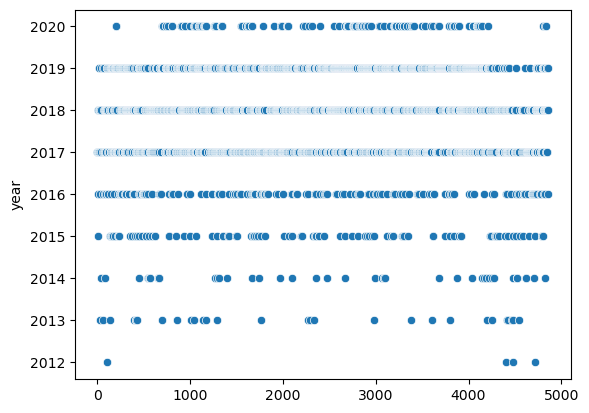

mileage


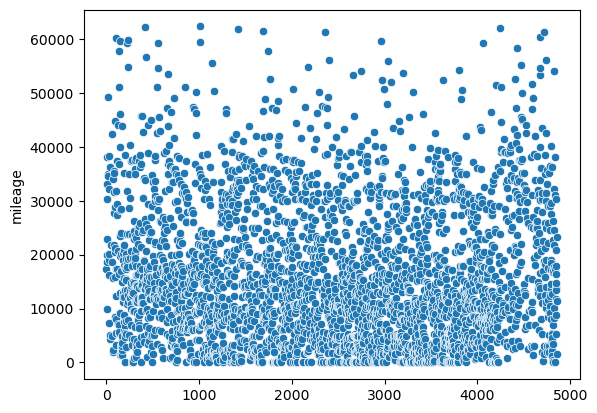

tax


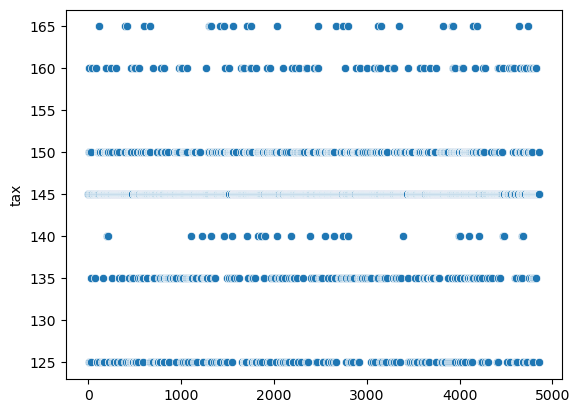

mpg


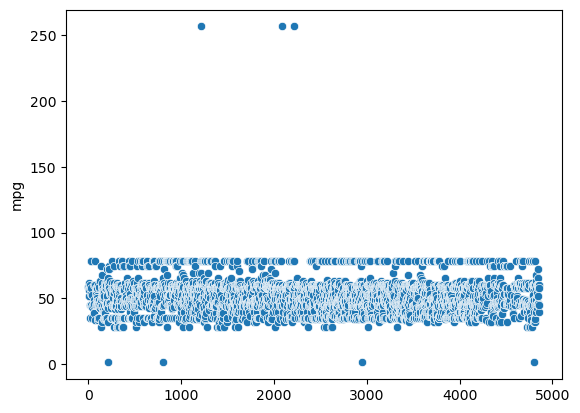

engineSize


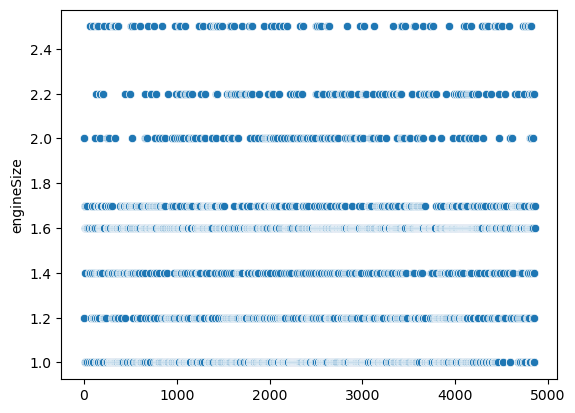

In [34]:
for column in hyundiDataSet.columns:
    if column not in ['transmission', 'fuelType', 'price', 'model']:
        print(column)
        sns.scatterplot(data=hyundiDataSet[column])
        plt.show()

In [16]:
# hyundiDataSet["year"].plot()

## b. Box Plots

year


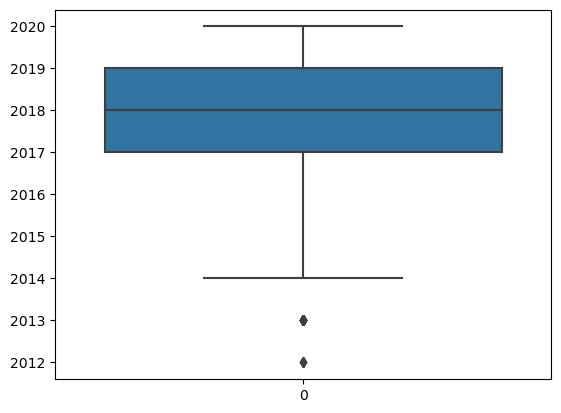

mileage


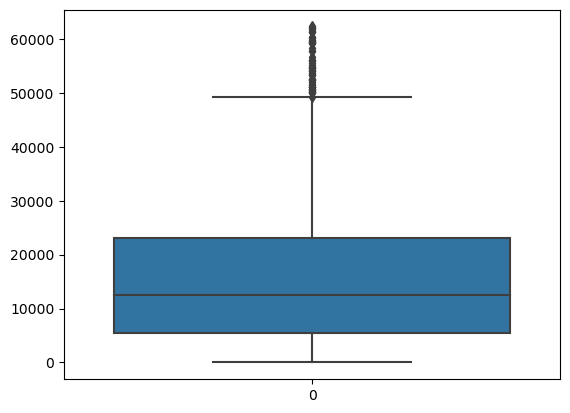

tax


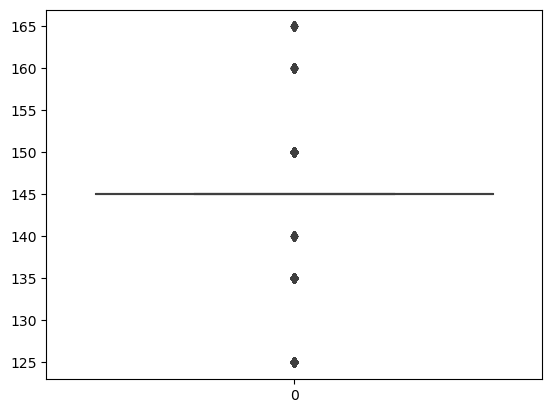

mpg


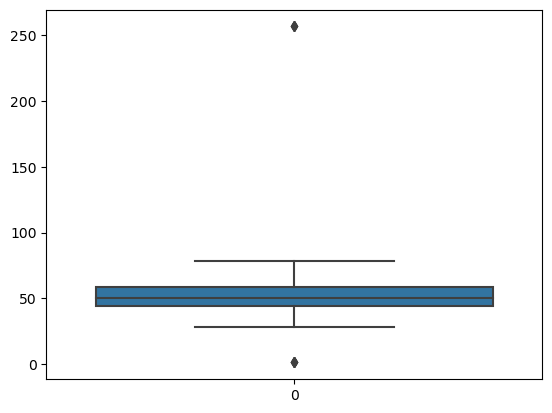

engineSize


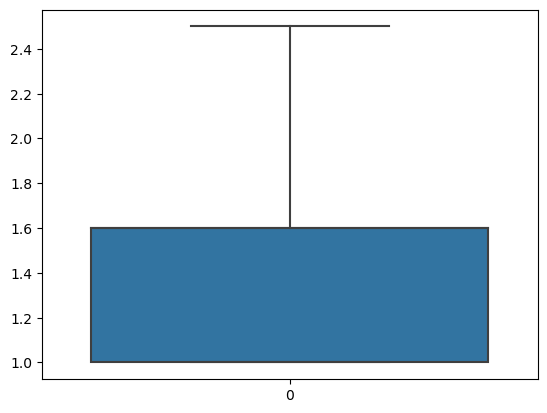

In [33]:
for column in hyundiDataSet.columns:
    if column not in ['transmission', 'fuelType', 'price', 'model']:
        print(column)
        sns.boxplot(data=hyundiDataSet[column])
        plt.show()

## c. PairPlot

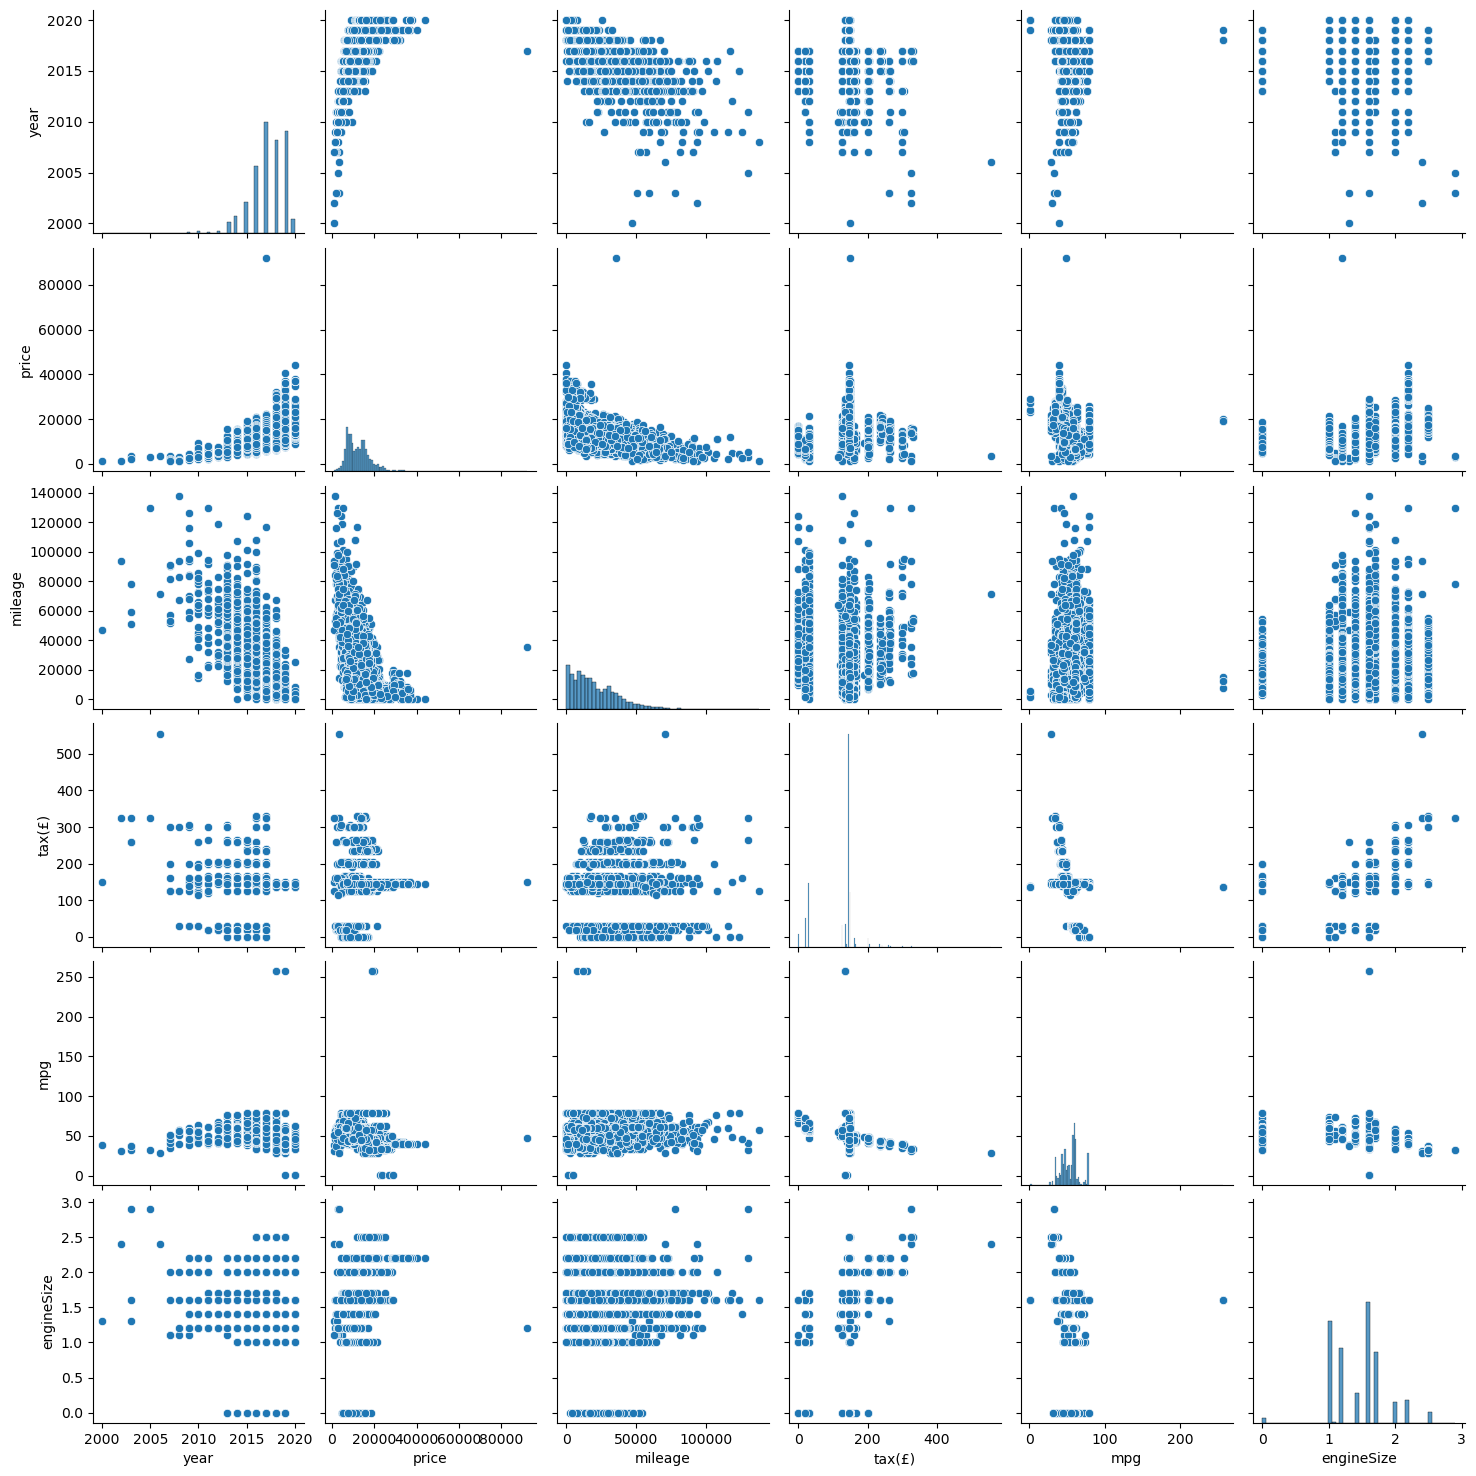

In [22]:
sns.pairplot(hyundiDataSet)

## d. LM Plot

year


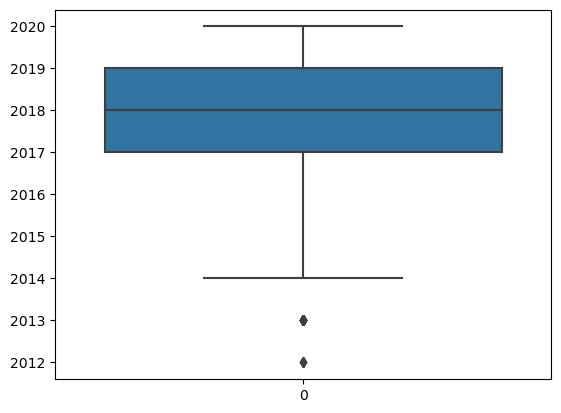

mileage


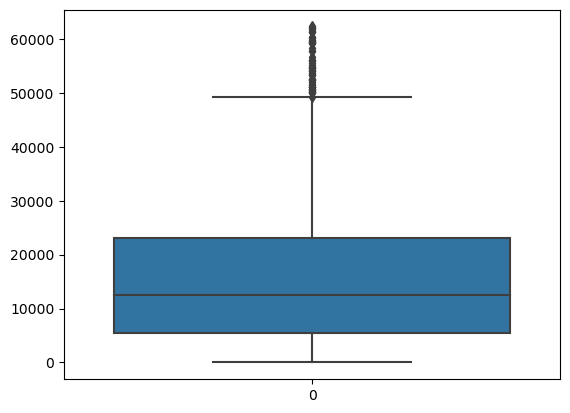

tax


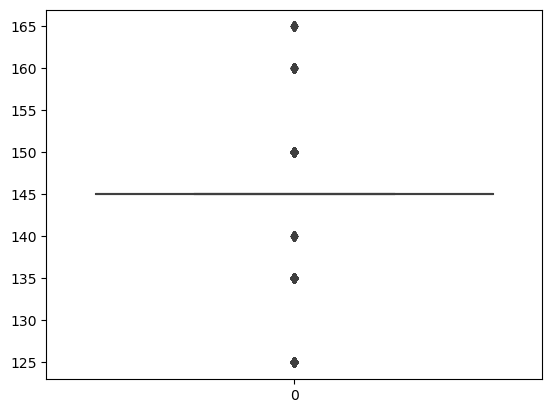

mpg


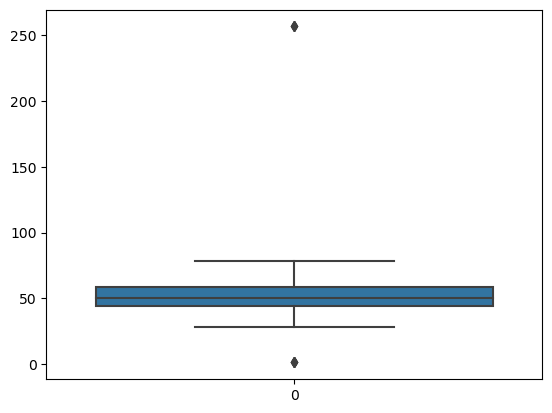

engineSize


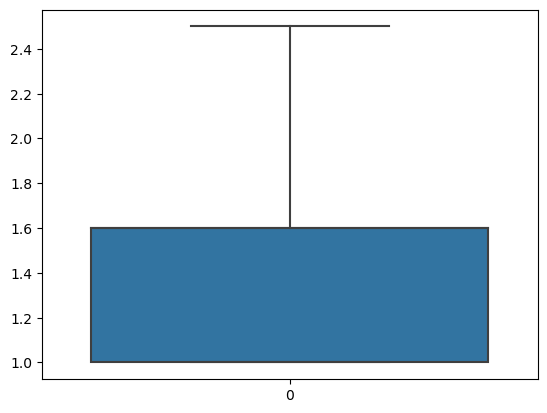

In [32]:
for column in hyundiDataSet.columns:
    if column not in ['transmission', 'fuelType', 'price', 'model']:
        print(column)
        sns.boxplot(data=hyundiDataSet[column])
        plt.show()

## e. Joinplot

year


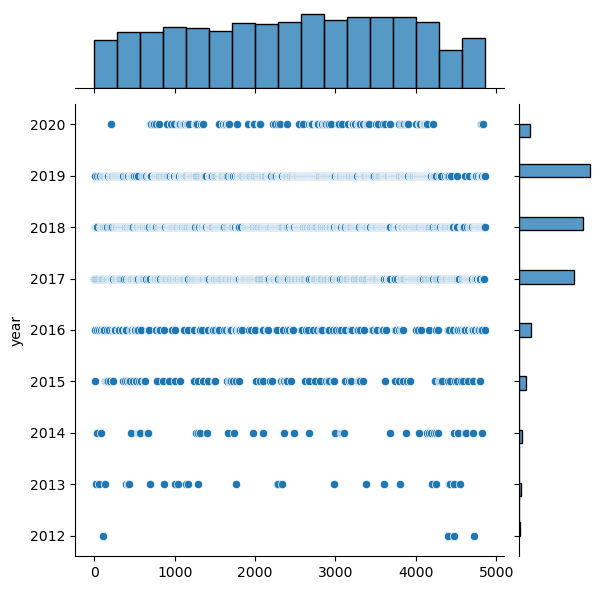

mileage


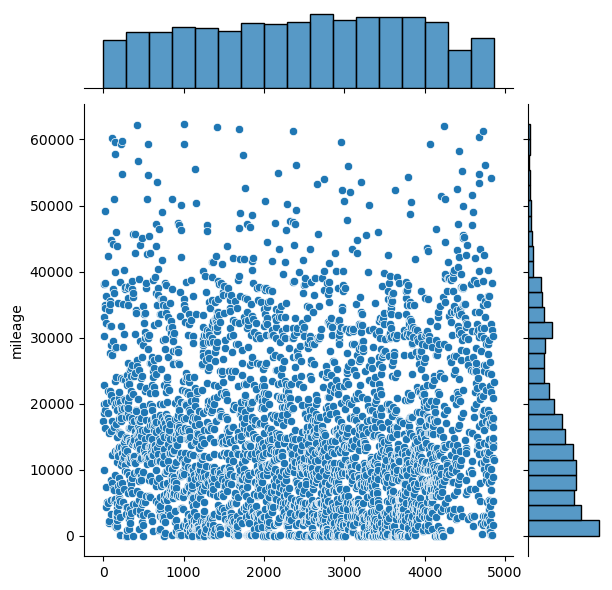

tax


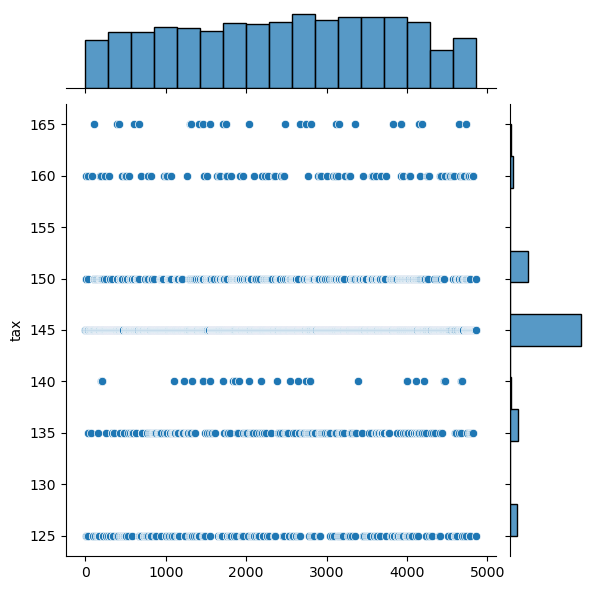

mpg


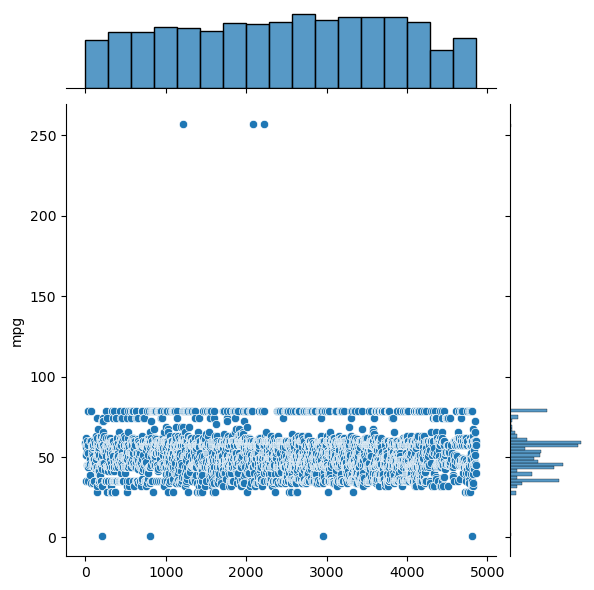

engineSize


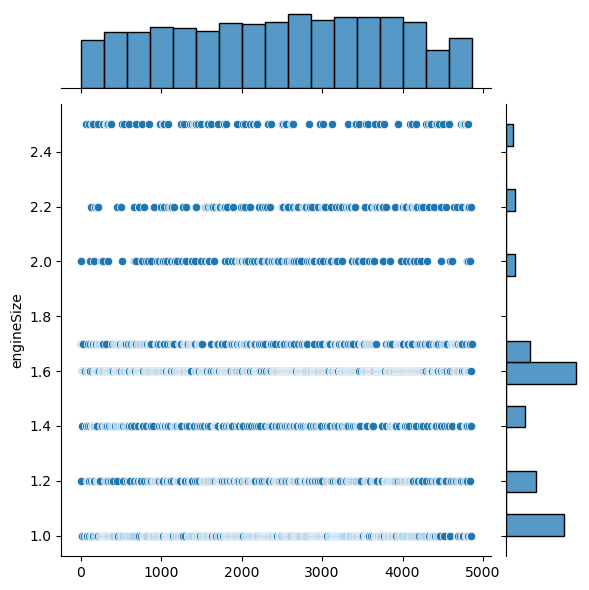

In [31]:
for column in hyundiDataSet.columns:
    if column not in ['transmission', 'fuelType', 'price', 'model']:
        print(column)
        sns.jointplot(data=hyundiDataSet[column])
        plt.show()

# 3. Correlation

C:\Users\user\AppData\Local\Temp\ipykernel_15544\4139998335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dc = hyundiDataSet.corr()


<Axes: >

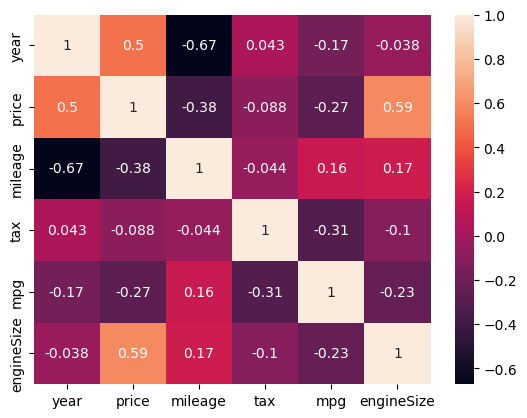

In [43]:
dc = hyundiDataSet.corr()
sns.heatmap(data=dc, annot=True)

# 4. Outlier Analysis & Data Cleaning

In [19]:
# Defining IQR and setting outliers with limit values
for column in hyundiDataSet.columns:
    if column not in ['transmission', 'fuelType', 'price', 'model', 'mpg']:
        Q1 = hyundiDataSet[column].quantile(0.25)
        Q3 = hyundiDataSet[column].quantile(0.75)
        IQR = Q3 - Q1
        
        print(column, Q1, Q3, IQR)
        hyundiDataSet = hyundiDataSet[~((hyundiDataSet[column] < (Q1 - 1.5 * IQR)) | (hyundiDataSet[column] > (Q3 + 1.5 * IQR)))]

year 2016.0 2019.0 3.0
mileage 8210.0 30393.0 22183.0
tax 125.0 145.0 20.0
engineSize 1.0 1.6 0.6000000000000001


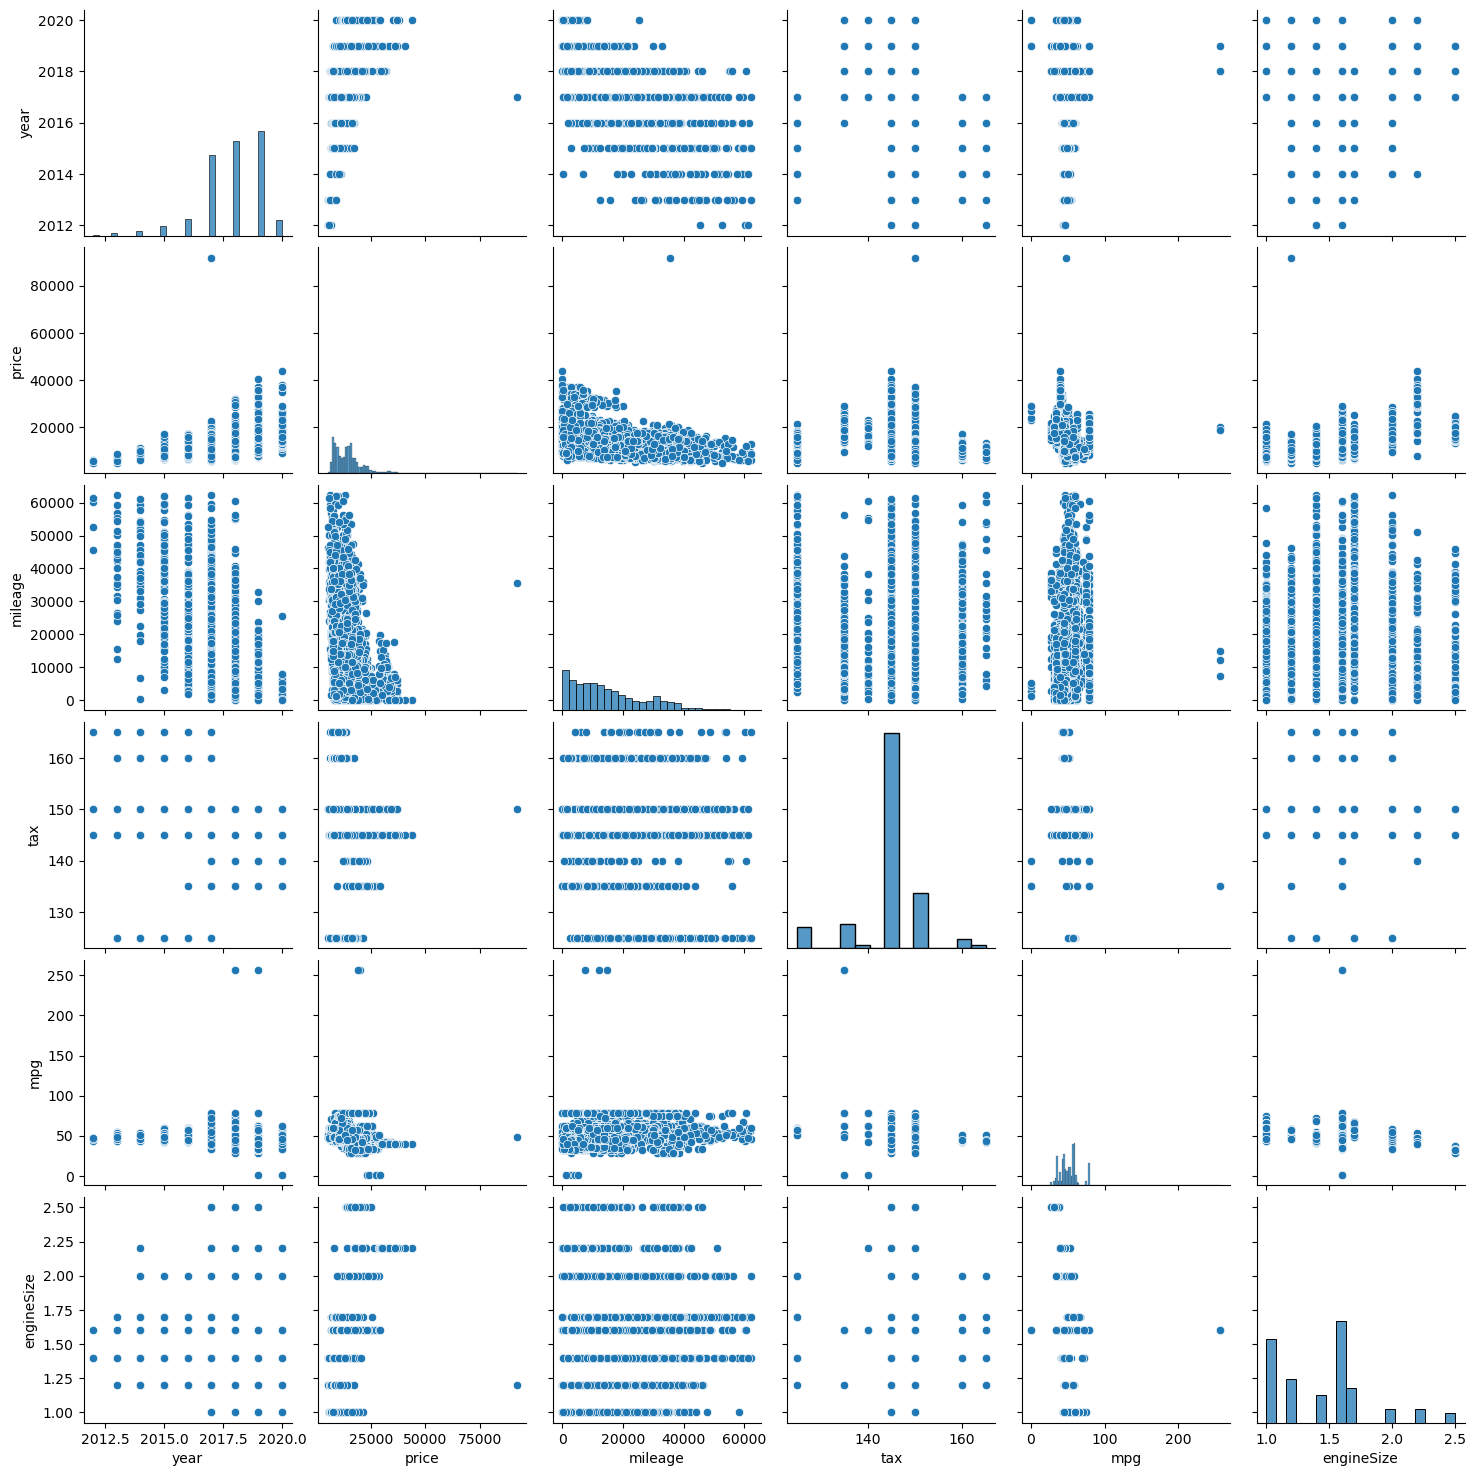

In [21]:
sns.pairplot(hyundiDataSet)

C:\Users\user\AppData\Local\Temp\ipykernel_15544\4139998335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dc = hyundiDataSet.corr()


<Axes: >

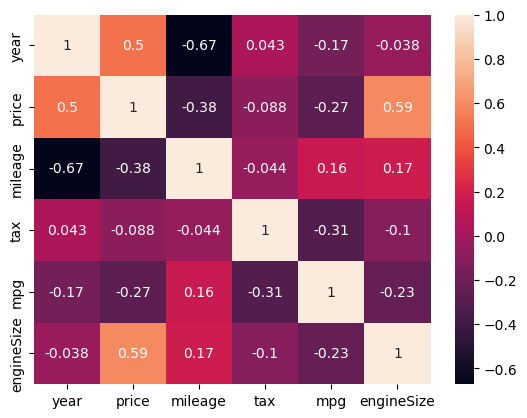

In [22]:
dc = hyundiDataSet.corr()
sns.heatmap(data=dc, annot=True)

In [24]:
for column in hyundiDataSet.columns:
    print(f"Column: {column}\nValues: {hyundiDataSet[column].unique()}\nCount:{hyundiDataSet[column].nunique()}\n")

Column: model
Values: [' I20' ' IX35' ' Tucson' ' I30' ' I10' ' Ioniq' ' Kona' ' Veloster'
 ' IX20' ' I800' ' I40' ' Santa Fe']
Count:12

Column: year
Values: [2017 2015 2016 2018 2019 2013 2014 2012 2020]
Count:9

Column: price
Values: [ 7999 10199 14199 ... 20985 15985 13994]
Count:1315

Column: transmission
Values: ['Manual' 'Automatic' 'Semi-Auto' 'Other']
Count:4

Column: mileage
Values: [17307 33177 30300 ...  1567 23313 11472]
Count:2819

Column: fuelType
Values: ['Petrol' 'Diesel' 'Hybrid' 'Other']
Count:4

Column: tax
Values: [145 160 125 150 135 165 140]
Count:7

Column: mpg
Values: [ 58.9  51.4  57.6  61.7  56.5  34.9  60.1  44.8  53.3  78.4  78.5  52.3
  35.3  43.5  38.7  48.7  45.6  33.6  57.7  50.4  47.9  46.3  62.8  42.8
  44.1  74.3  28.   31.7  67.3  41.5  55.4  34.   39.2  36.2  72.4  47.1
   1.1  65.7  54.3  42.2  46.   61.4  39.8  68.9  49.6  35.8  37.7 256.8
  37.2  40.9  64.2  40.4  70.6  34.5  38.2]
Count:55

Column: engineSize
Values: [1.2 2.  1.7 1.4 1.  1.6 2.

In [49]:
# can't use model since too many unique values, other categorical columns can be one hot encoded
hyundiDataSetOneHotEncoded = pd.get_dummies(hyundiDataSet, columns=['transmission', 'fuelType'])

In [50]:
hyundiDataSetOneHotEncoded

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,I20,2017,7999,17307,145,58.9,1.2,0,1,0,0,0,0,0,1
4,IX35,2015,10199,33177,160,51.4,2.0,0,1,0,0,1,0,0,0
7,Tucson,2016,14199,30300,125,57.6,1.7,1,0,0,0,1,0,0,0
8,I30,2018,10399,38082,145,51.4,1.4,1,0,0,0,0,0,0,1
10,Tucson,2017,13200,22888,150,61.7,1.7,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,I10,2018,7995,8851,145,60.1,1.0,0,1,0,0,0,0,0,1
4852,I10,2018,7200,14788,150,60.1,1.0,0,1,0,0,0,0,0,1
4854,Santa Fe,2019,29995,1567,145,39.8,2.2,0,0,0,1,1,0,0,0
4858,Tucson,2018,13994,23313,145,44.8,1.6,0,1,0,0,0,0,0,1


C:\Users\user\AppData\Local\Temp\ipykernel_15544\1501532349.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data=hyundiDataSetOneHotEncoded.corr(), annot=True, linewidths=.5, cmap="YlGnBu", annot_kws={"size": 10})


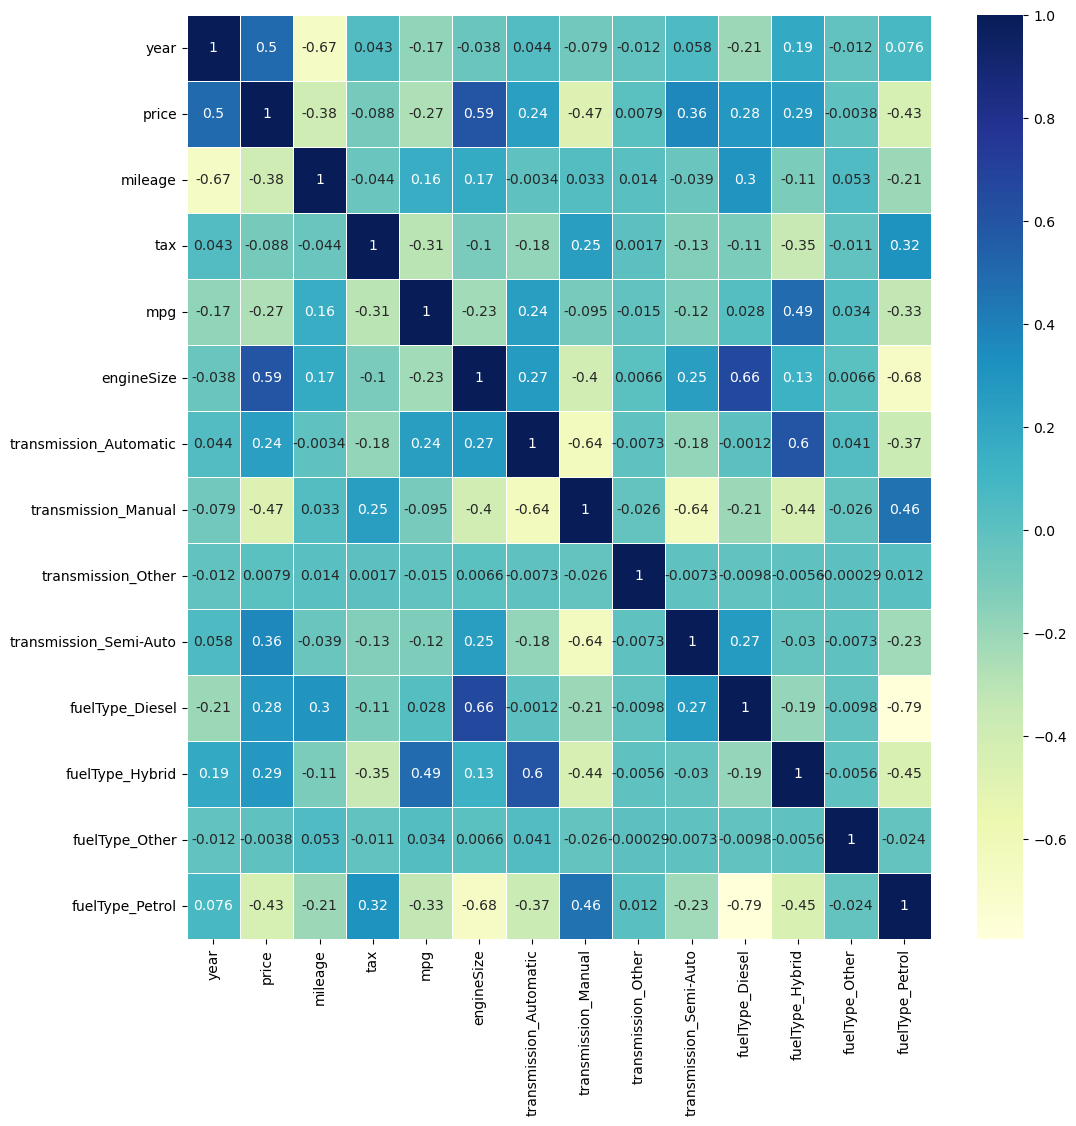

In [51]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(data=hyundiDataSetOneHotEncoded.corr(), annot=True, linewidths=.5, cmap="YlGnBu", annot_kws={"size": 10})
plt.show()

In [59]:
hyundiDataSet.columns
hyundiDataSet.fuelType.value_counts()
hyundiDataSet.transmission.value_counts()

Manual       2354
Semi-Auto     525
Automatic     516
Other           1
Name: transmission, dtype: int64

In [52]:
hyundiDataSetOneHotEncoded.fuelType_Hybrid.value_counts()

0    3074
1     322
Name: fuelType_Hybrid, dtype: int64

In [56]:
hyundiDataSetOneHotEncoded = hyundiDataSetOneHotEncoded.drop('fuelType_Other', axis=1)

In [57]:
hyundiDataSetOneHotEncoded = hyundiDataSetOneHotEncoded.drop('transmission_Other', axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_15544\1501532349.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data=hyundiDataSetOneHotEncoded.corr(), annot=True, linewidths=.5, cmap="YlGnBu", annot_kws={"size": 10})


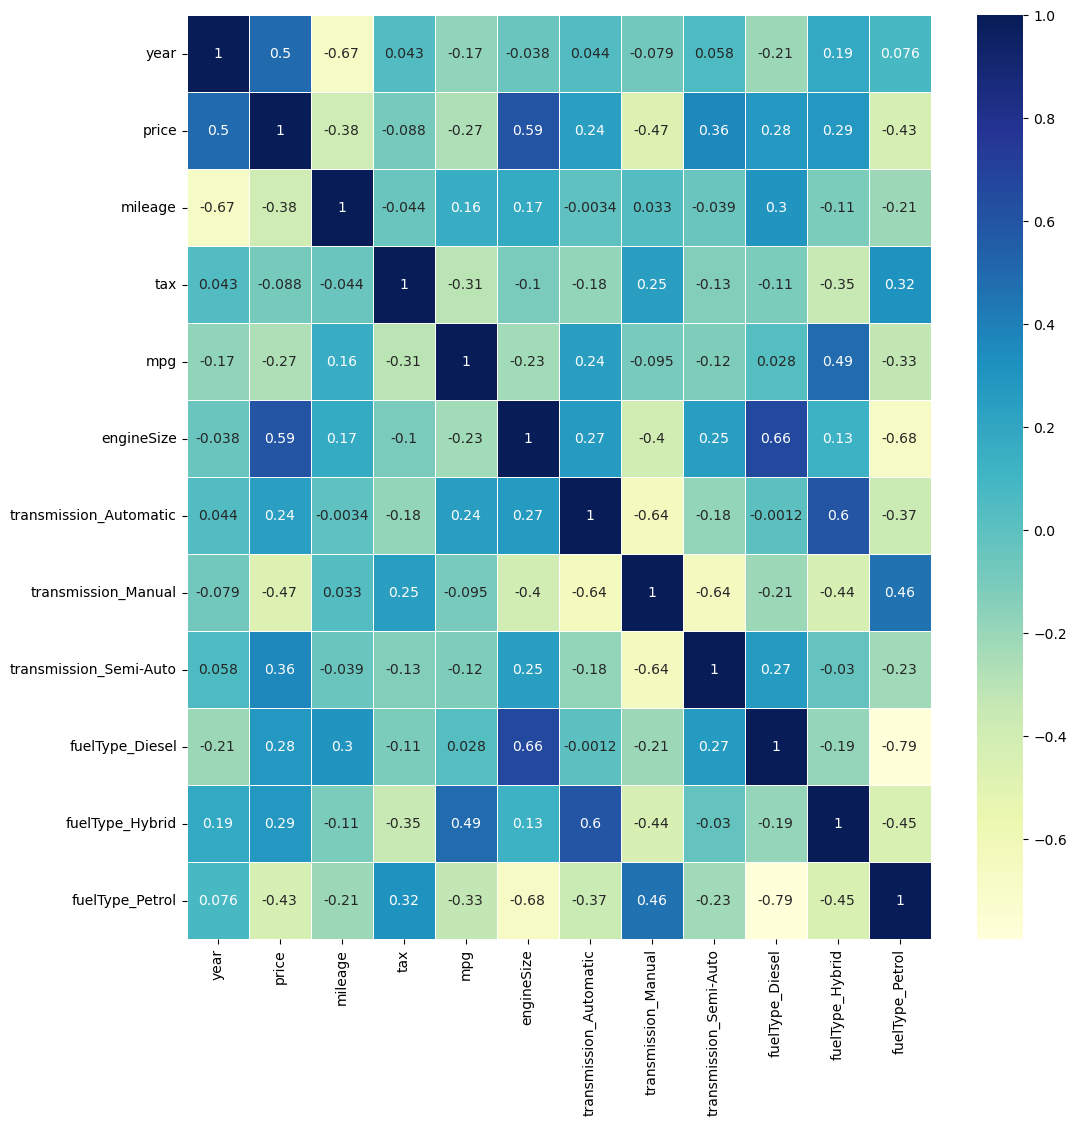

In [58]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(data=hyundiDataSetOneHotEncoded.corr(), annot=True, linewidths=.5, cmap="YlGnBu", annot_kws={"size": 10})
plt.show()